# Bank loan Campaign Prediction

First of all we will import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:/Users/Umer/Documents/Code_Workplace/Pyton/Ai_Project/Datasets/Bank_Personal_Loan_Modelling.csv")
df.sample(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2114,2115,62,36,69,95039,2,1.70,3,0,0,0,0,1,0
3943,3944,61,36,188,91360,1,9.30,2,0,1,0,0,0,0
2805,2806,37,12,182,94523,3,5.80,3,0,1,0,0,1,0
1663,1664,57,32,42,95070,3,0.50,2,0,0,1,0,1,0
2716,2717,41,17,34,92182,1,2.00,2,0,0,0,0,0,0
1653,1654,26,1,24,96651,2,0.90,3,123,0,0,0,0,1
1001,1002,57,32,55,90717,4,2.10,1,108,0,0,0,1,0
3638,3639,47,22,38,92866,4,1.90,3,0,0,0,0,1,0
662,663,65,41,185,93561,3,2.00,2,0,1,0,0,0,0
3163,3164,51,27,52,94132,2,1.00,3,0,0,0,0,0,0


So this is a dataset about bank loan prediction campaign

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

So we check that there is no missing data so we will continue next

In [6]:
df2 = df.drop(["Personal Loan","ID"],axis =1 )
X=df2
Y = df["Personal Loan"]


In [7]:
core = df.corr()


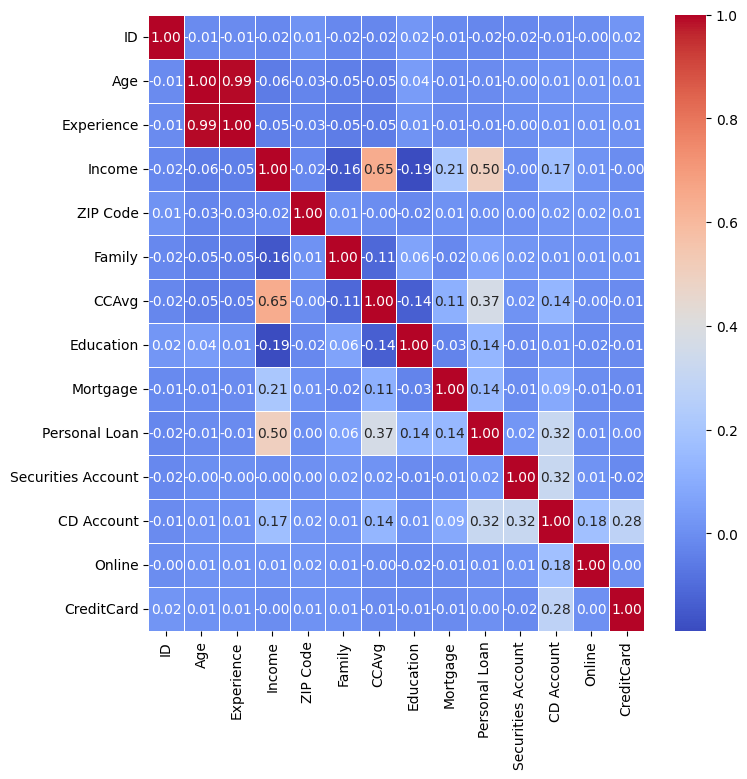

In [8]:
fig = plt.figure(figsize =(8,8))
correlation = sns.heatmap(core,annot =True,cmap ='coolwarm',fmt='.2f',linewidth =0.5)
plt.show()

Now we will preprocess it with standard scaler

In [9]:
standard_scaler = StandardScaler()
X_scaler = standard_scaler.fit_transform(X)

Full we need to split data into train and split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state =42)

Now we will train model on scaled data

In [17]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)
SVM_model_predict = SVM_model.predict(X)
SVM_model_predict

array([0, 0, 0, ..., 0, 0, 0], shape=(5000,))

Now we need to check the accuracy of model 

In [20]:
SVM_model_predict = SVM_model.predict(X_test)
model_accuracy = accuracy_score(y_test, SVM_model_predict)
print(f"The accuracy of model is {model_accuracy*100}")
print(f"The accuracy of model is {model_accuracy*100}")

The accuracy of model is 89.5
The accuracy of model is 89.5
